# Prediction of Person Kinematic Motions

Dataset Source: https://www.kaggle.com/datasets/sanamps/predict-kinematic-motion

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('Kinematics_Data.csv')

# Knowing the Dataset

In [3]:
df.head()

,date,time,username,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,2017-6-30,13:51:15:847724020,viktor,0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,2017-6-30,13:51:16:246945023,viktor,0,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,2017-6-30,13:51:16:446233987,viktor,0,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,2017-6-30,13:51:16:646117985,viktor,0,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,2017-6-30,13:51:16:846738994,viktor,0,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [4]:
df.shape

(88588, 11)

In [5]:
df.columns

Index(['date', 'time', 'username', 'wrist', 'activity', 'acceleration_x',
       'acceleration_y', 'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88588 entries, 0 to 88587
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            88588 non-null  object 
 1   time            88588 non-null  object 
 2   username        88588 non-null  object 
 3   wrist           88588 non-null  int64  
 4   activity        88588 non-null  int64  
 5   acceleration_x  88588 non-null  float64
 6   acceleration_y  88588 non-null  float64
 7   acceleration_z  88588 non-null  float64
 8   gyro_x          88588 non-null  float64
 9   gyro_y          88588 non-null  float64
 10  gyro_z          88588 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 7.4+ MB


In [7]:
df.describe()

,wrist,activity,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
count,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000,88588.000000
mean,0.522170,0.500801,-0.074811,-0.562585,-0.313956,0.004160,0.037203,0.022327
std,0.499511,0.500002,1.009299,0.658458,0.486815,1.253423,1.198725,1.914423
min,0.000000,0.000000,-5.350500,-3.299000,-3.753800,-4.430600,-7.464700,-9.480000
25%,0.000000,0.000000,-0.381800,-1.033500,-0.376000,-0.920700,-0.644825,-1.345125
50%,1.000000,1.000000,-0.059500,-0.759100,-0.221000,0.018700,0.039300,0.006900
75%,1.000000,1.000000,0.355500,-0.241775,-0.085900,0.888800,0.733700,1.398200
max,1.000000,1.000000,5.603300,2.668000,1.640300,4.874200,8.498000,11.266200


In [8]:
df.dtypes

date               object
time               object
username           object
wrist               int64
activity            int64
acceleration_x    float64
acceleration_y    float64
acceleration_z    float64
gyro_x            float64
gyro_y            float64
gyro_z            float64
dtype: object

# Missing Values Treatement

In [9]:
df.isnull().sum()

date              0
time              0
username          0
wrist             0
activity          0
acceleration_x    0
acceleration_y    0
acceleration_z    0
gyro_x            0
gyro_y            0
gyro_z            0
dtype: int64

In [10]:
df.drop(['date','time','username'],axis=1,inplace=True)

In [11]:
df.columns

Index(['wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

# EDA

In [12]:
n_col=['wrist', 'activity', 'acceleration_x', 'acceleration_y','acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z']

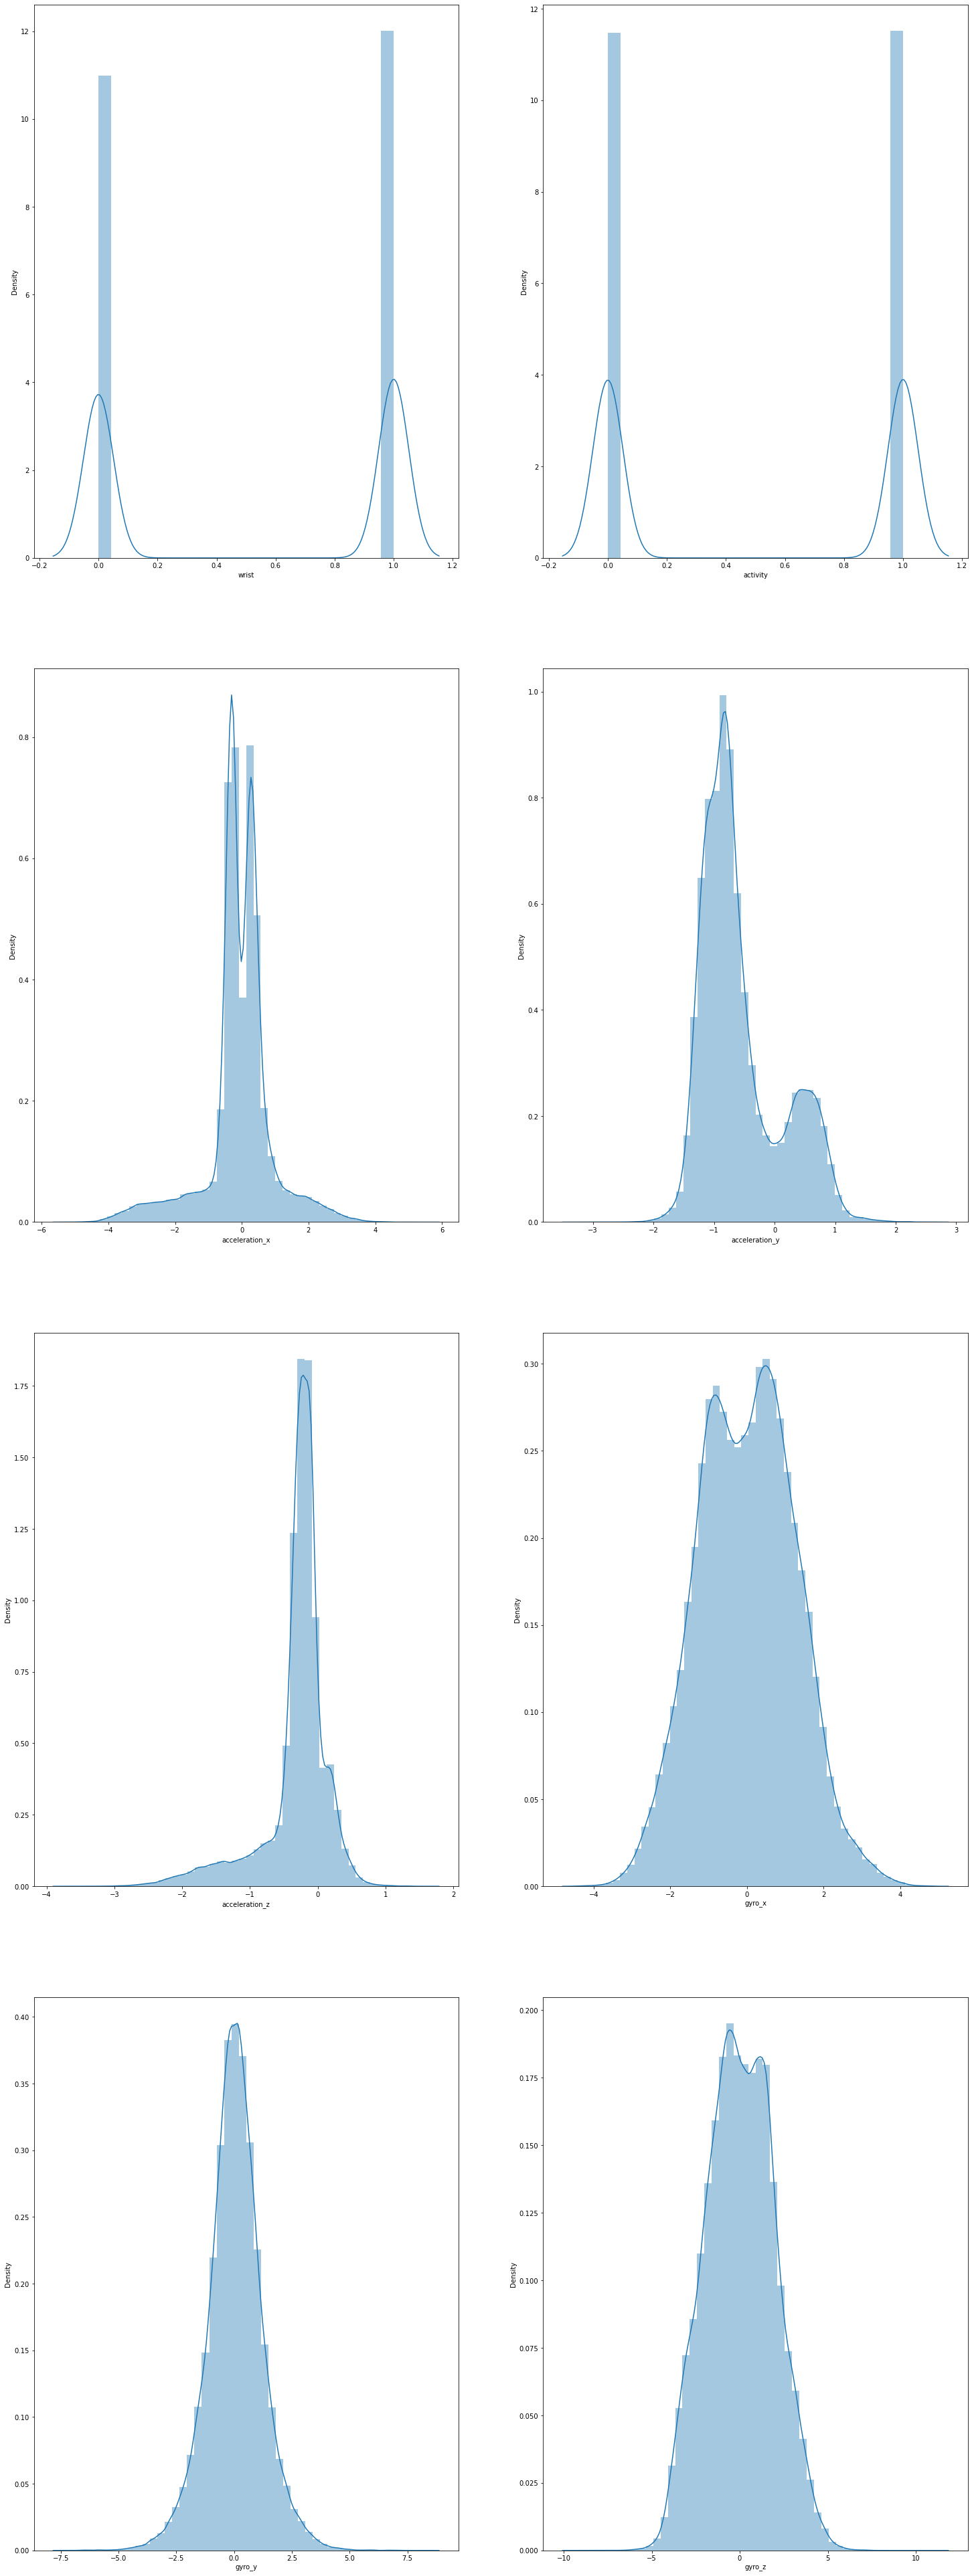

In [13]:
plt.figure(figsize=(25,70))
for idx, col in enumerate(n_col):
    plt.subplot(4,2,idx+1)
    sns.distplot(df[col])

In [14]:
df.columns

Index(['wrist', 'activity', 'acceleration_x', 'acceleration_y',
       'acceleration_z', 'gyro_x', 'gyro_y', 'gyro_z'],
      dtype='object')

<AxesSubplot:>

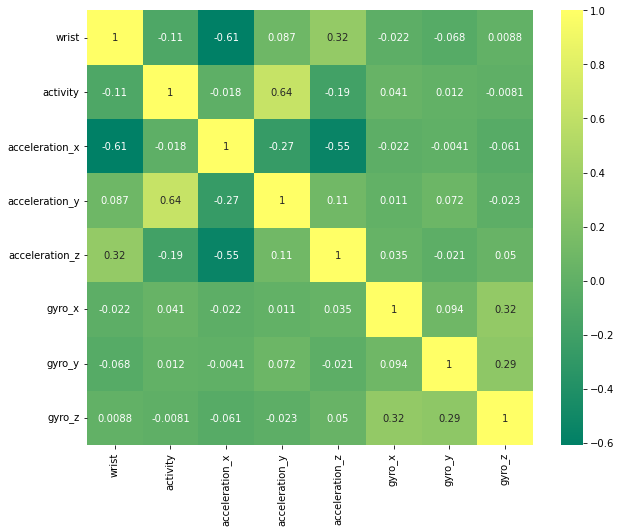

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,cmap='summer')

<AxesSubplot:xlabel='activity', ylabel='count'>

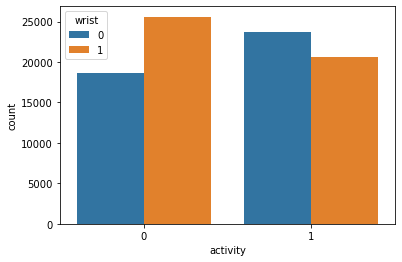

In [16]:
sns.countplot(x='activity',data=df,hue='wrist')

# Spliting data into X and Y

In [17]:
X=df.drop('activity',axis=1)
Y=df['activity']

In [18]:
X.head()

,wrist,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
0,0,0.2650,-0.7814,-0.0076,-0.0590,0.0325,-2.9296
1,0,0.6722,-1.1233,-0.2344,-0.1757,0.0208,0.1269
2,0,0.4399,-1.4817,0.0722,-0.9105,0.1063,-2.4367
3,0,0.3031,-0.8125,0.0888,0.1199,-0.4099,-2.9336
4,0,0.4814,-0.9312,0.0359,0.0527,0.4379,2.4922


In [19]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: activity, dtype: int64

# Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.3, random_state = 101)

In [21]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(62011, 7)
(62011,)
(26577, 7)
(26577,)


# Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
logi_model=LogisticRegression()
logi_model.fit(X_train,Y_train)

LogisticRegression()

In [23]:
print('Logistic Regression Model Score',logi_model.score(X_train,Y_train)*100)

Logistic Regression Model Score 86.07021334924448


# Confusion Matrix of LR

In [24]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
Y_pred=logi_model.predict(X_test)

In [26]:
confusion_matrix(Y_test, Y_pred)

array([[11982,  1276],
       [ 2434, 10885]], dtype=int64)

In [27]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87     13258
           1       0.90      0.82      0.85     13319

    accuracy                           0.86     26577
   macro avg       0.86      0.86      0.86     26577
weighted avg       0.86      0.86      0.86     26577



# Decision Tree Classifier

In [28]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)

DecisionTreeClassifier()

In [29]:
Y_pred=dt.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [31]:
accuracy

0.984083982390789

# Confusion Matrix of DTC

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [33]:
Y_pred=dt.predict(X_test)

In [34]:
confusion_matrix(Y_test, Y_pred)

array([[13029,   229],
       [  194, 13125]], dtype=int64)

In [35]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98     13258
           1       0.98      0.99      0.98     13319

    accuracy                           0.98     26577
   macro avg       0.98      0.98      0.98     26577
weighted avg       0.98      0.98      0.98     26577



# Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)

RandomForestClassifier()

In [37]:
Y_pred=rf.predict(X_test)

In [38]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [39]:
accuracy

0.9913082740715656

# Confusion Matrix of RFC

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [41]:
Y_pred=rf.predict(X_test)

In [42]:
confusion_matrix(Y_test, Y_pred)

array([[13139,   119],
       [  112, 13207]], dtype=int64)

In [43]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13258
           1       0.99      0.99      0.99     13319

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



# SVM

In [44]:
from sklearn.svm import SVC
model_sv = SVC()
model_sv.fit(X_train,Y_train)

SVC()

In [45]:
Y_pred=model_sv.predict(X_test)

In [46]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [47]:
accuracy

0.9889754298829815

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [49]:
Y_pred=model_sv.predict(X_test)

In [50]:
confusion_matrix(Y_test, Y_pred)

array([[13138,   120],
       [  173, 13146]], dtype=int64)

In [51]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13258
           1       0.99      0.99      0.99     13319

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577



# KNN

In [52]:
from sklearn.neighbors import KNeighborsClassifier
model_knn=KNeighborsClassifier()
model_knn.fit(X_train,Y_train)

KNeighborsClassifier()

In [53]:
Y_pred=model_knn.predict(X_test)

In [54]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, Y_pred)

In [55]:
accuracy

0.9882228994995673

In [56]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [57]:
Y_pred=model_knn.predict(X_test)

In [58]:
confusion_matrix(Y_test, Y_pred)

array([[13167,    91],
       [  222, 13097]], dtype=int64)

In [59]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99     13258
           1       0.99      0.98      0.99     13319

    accuracy                           0.99     26577
   macro avg       0.99      0.99      0.99     26577
weighted avg       0.99      0.99      0.99     26577

